In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp
from sympy import *
import numpy as np
from scipy.integrate import solve_ivp

In [2]:
def dW_dt(t, W, sigma, r, b):
    """ derivative of W=[X,Y,Z]
    input:
    W - array-like, array of [X,Y,Z]
    sigma: the Prandtl number
    r: Rayleigh number
    b: dimensionless length scale
    
    derivatives:
    dW1 - X dot
    dW2 - Y dot
    dW3 - Z dot
    """
    X=W[0]
    Y=W[1]
    Z=W[2]
    
    return [-sigma*(X-Y), r*X - Y - X*Z, -b*Z + X*Y]


In [3]:
#initial conditions
W0=[0., 1., 0.,]
X0, Y0, Z0= W0
args=(10., 28, 8./3.)
sigma, r, b=args

t_span = [0.0,60]

t = np.linspace(0, 60, 1000)

In [4]:
#solving ODEs
sol = solve_ivp(fun=dW_dt,y0=W0,t_span=t_span,args=args)
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 5702
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 9.99000994e-05, 1.09890109e-03, 1.10889110e-02,
       4.28837889e-02, 8.56273695e-02, 1.43039419e-01, 2.19857716e-01,
       3.18325216e-01, 3.77737486e-01, 4.37149756e-01, 4.84458319e-01,
       5.30138804e-01, 5.88015468e-01, 6.55669651e-01, 7.35691806e-01,
       8.19745571e-01, 9.23599324e-01, 1.05065343e+00, 1.18639521e+00,
       1.33536579e+00, 1.48208081e+00, 1.62104776e+00, 1.75958807e+00,
       1.89101539e+00, 2.02244271e+00, 2.18645277e+00, 2.33540839e+00,
       2.46814955e+00, 2.60089071e+00, 2.76270792e+00, 2.89911679e+00,
       3.03370531e+00, 3.17830102e+00, 3.31787092e+00, 3.45241114e+00,
       3.58695137e+00, 3.71232007e+00, 3.83768877e+00, 4.00127530e+00,
       4.13290655e+00, 4.26280325e+00, 4.40327586e+00, 4.53637604e+00,
       4.67187661e+00, 4.80737719e+00, 

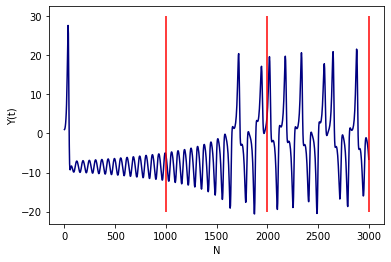

In [5]:
#Lorentz figure 1

del_t=0.01

#N=number of iterations
#=t/delta_t
t1=np.linspace(0,30,1000)
sol = solve_ivp(fun=dW_dt,y0=W0,t_span=t_span,args=args, t_eval=t1)
plt.plot(t1/del_t,sol.y[1], color='navy')
plt.ylabel('Y(t)')
plt.xlabel("N")

plt.vlines(1000, -20,30, colors='red')
plt.vlines(2000, -20,30, colors='red')
plt.vlines(3000, -20,30, colors='red')


Text(0, 0.5, '-X(t)')

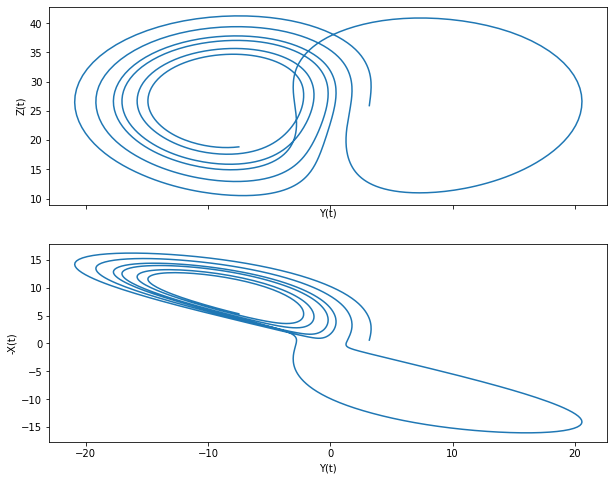

In [6]:
#Lorenz figure 2:

#plot together
f,ax = plt.subplots(2,1,figsize=(10,8),sharex=True)

t=np.linspace(14,19,1000)
sol = solve_ivp(fun=dW_dt,y0=W0,t_span=t_span,args=args, t_eval=t)
W=sol.y

ax[0].plot(W[1], W[2])
ax[0].set_xlabel("Y(t)")
ax[0].set_ylabel("Z(t)")

ax[1].plot(W[1], -W[0])
ax[1].set_xlabel("Y(t)")
ax[1].set_ylabel("-X(t)")

In [7]:
#W':
l=(0., 1e-8, 0.)
W0_1= np.add(W0,l)
t=np.linspace(0,10,1000)

sol1 = solve_ivp(fun=dW_dt,y0=W0_1,t_span=t_span,args=args, t_eval=t)
sol2 = solve_ivp(fun=dW_dt,y0=W0,t_span=t_span,args=args, t_eval=t)

W=sol2.y

In [8]:
#distance between W' and W:
diff= np.sqrt((W[0]-sol1.y[0])**2+(W[1]-sol1.y[1])**2+(W[2]-sol1.y[2])**2)    
print(np.log(diff))

[-18.42068075 -18.41265441 -18.37326305 -18.30986664 -18.22939937
 -18.13712056 -18.03652669 -17.93035284 -17.82051422 -17.70825308
 -17.59415279 -17.47875519 -17.36249986 -17.24575561 -17.1288337
 -17.01195369 -16.89480515 -16.77753251 -16.66037678 -16.543555
 -16.42723223 -16.31151059 -16.19686262 -16.08852385 -15.97398091
 -15.85827528 -15.74476104 -15.6353873  -15.5309717  -15.43141004
 -15.33581584 -15.24261369 -15.15146178 -15.07127023 -14.9992384
 -14.9370653  -14.88632555 -14.84791241 -14.81729975 -14.80330846
 -14.8150927  -14.83858167 -14.86144216 -14.87632583 -14.89482277
 -14.93868141 -14.98948778 -15.04707115 -15.11483017 -15.19284148
 -15.27488439 -15.36435355 -15.46062475 -15.56126951 -15.66677948
 -15.77451108 -15.88570476 -16.00049506 -16.11746104 -16.23397461
 -16.35222314 -16.47157926 -16.59180261 -16.71241559 -16.83262142
 -16.95123442 -17.06571724 -17.17976579 -17.2949537  -17.40966395
 -17.52151413 -17.62720949 -17.72255819 -17.80282216 -17.87015157
 -17.93240183 

Text(0, 0.5, "log of distance between W and W'")

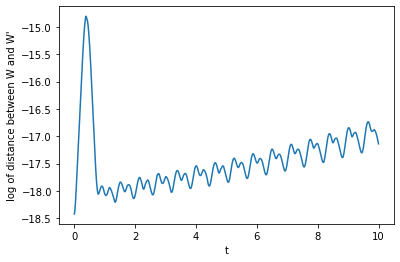

In [9]:
#plotting result on semilog plot:


plt.plot(t, np.log(diff))
plt.xlabel("t")
plt.ylabel("log of distance between W and W'")
#the initial conditions were slightly changed, which caused the graph to be non linear